In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import confusion_matrix


In [2]:
# Train and Test data for 10000 rows

In [3]:
# load the first 10000 data from each dataset.
df_train_10000 = pd.read_csv("train.csv", nrows=10000) # header, column_names, nrows are some of the parameters while reading the file
df_test_10000 = pd.read_csv("test.csv", nrows=10002) # header, column_names, nrows are some of the parameters while reading the file

In [4]:
# Note: In Test Data, we are taking 10002 data as it contains 2 null values which will be verified later

In [5]:
# prints the first 5 rows of train data
df_train_10000.head()

,label,title,content
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,1,Amazing!,This soundtrack is my favorite music of all ti...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [6]:
# prints the first 5 rows of test data
df_test_10000.head()

,label,title,content
0,1,Great CD,My lovely Pat has one of the GREAT voices of h...
1,1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,1,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,1,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


### EDA - Exploratory Data Analysis

In [7]:
# prints the count of each column in the train data
df_train_10000.count()

label      10000
title      10000
content    10000
dtype: int64

In [8]:
# prints the count of each column in the test data
df_test_10000.count()

label      10002
title      10000
content    10002
dtype: int64

In [9]:
# check the number of values in the taget variable
# this is done to ensure that ouput data will not be biased to a class
df_train_10000['label'].value_counts()

label
0    5097
1    4903
Name: count, dtype: int64

In [10]:
# check the number of values in the taget variable
# this is done to ensure that ouput data will not be biased to a class
df_test_10000['label'].value_counts()

label
1    5126
0    4876
Name: count, dtype: int64

In [11]:
# since the values are somewhat nearer and hence it is a balanced data

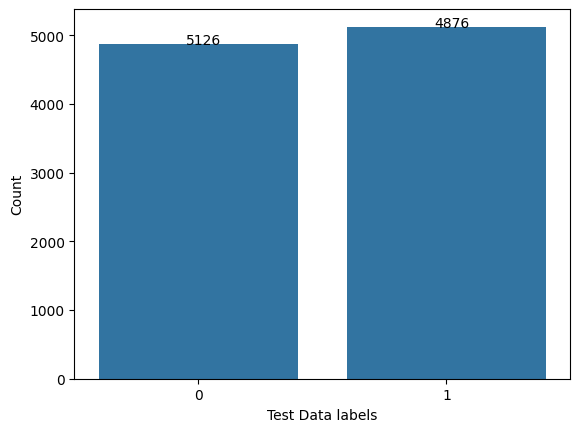

In [12]:
# plotting the countplot of label (target) in test data
ax = sns.countplot(x='label',data=df_test_10000)

# setting the xlabel and ylabel of the graph
ax.set(xlabel='Test Data labels', ylabel='Count')

# Adding labels to the graph indicating the count (in number)
for p, label in zip(ax.patches, df_test_10000["label"].value_counts()):
    ax.annotate(label, (p.get_x()+0.350, p.get_height()+1))

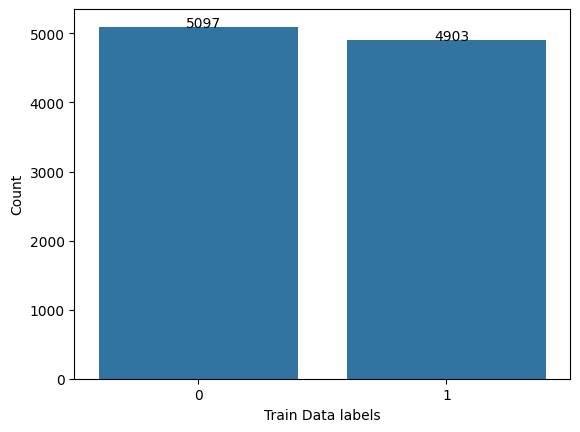

In [13]:
# plotting the countplot of label (target) in test data
ax=sns.countplot(x='label',data=df_train_10000)

# setting the xlabel and ylabel of the graph
ax.set(xlabel='Train Data labels', ylabel='Count')

# Adding labels to the graph indicating the count (in number)
for p, label in zip(ax.patches, df_train_10000["label"].value_counts()):
    ax.annotate(label, (p.get_x()+0.350, p.get_height()+1))

In [14]:
# description of the train data
df_train_10000.describe(include = 'all')

,label,title,content
count,10000.000000,10000,10000
unique,NaN,9320,9998
top,NaN,Disappointed,"A well-crafted, sharp-witted tale that will be..."
freq,NaN,27,2
mean,0.490300,NaN,NaN
std,0.499931,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,0.000000,NaN,NaN
75%,1.000000,NaN,NaN


In [15]:
# description of the test data
df_test_10000.describe(include = 'all')

,label,title,content
count,10002.000000,10000,10002
unique,NaN,9443,9999
top,NaN,Disappointing,Rather pretentious comedy featuring Mel Gibson...
freq,NaN,29,2
mean,0.512498,NaN,NaN
std,0.499869,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,1.000000,NaN,NaN
75%,1.000000,NaN,NaN


In [16]:
# Check for Null Values in the train data
df_train_10000.isnull().sum()

label      0
title      0
content    0
dtype: int64

In [17]:
# Check for Null Values in the test data
df_test_10000.isnull().sum()

label      0
title      2
content    0
dtype: int64

In [18]:
# There are no null values in the train data, however there are 2 null values in the test data

In [19]:
# Drop the null value data from the train data
df_test_10000.dropna(inplace=True)

In [20]:
# Check for Null Values in the train data
df_test_10000.isnull().sum()

label      0
title      0
content    0
dtype: int64

In [21]:
# prints the names of all the columns in the train data
df_train_10000.columns

Index(['label', 'title', 'content'], dtype='object')

In [22]:
# prints the names of all the columns in the test data
df_test_10000.columns

Index(['label', 'title', 'content'], dtype='object')

In [23]:
# create a new column named 'data_type' in the train data with value as "train"
df_train_10000['data_type'] = 'train'

# create a new column named 'data_type' in the test data with value as "test"
df_test_10000['data_type'] = 'test'

In [24]:
# prints the train data
df_train_10000

,label,title,content,data_type
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train
...,...,...,...,...
9995,1,A revelation of life in small town America in ...,"Though a scholarly biography, the book reveals...",train
9996,1,Great biography of a very interesting journalist,"This biography of Arthur Aull, a small-town jo...",train
9997,0,Interesting Subject; Poor Presentation,You'd be hard-pressed to tell a boring story a...,train
9998,0,Don't buy,The box looked used and it is obviously not ne...,train


In [25]:
# prints the test data
df_test_10000

,label,title,content,data_type
0,1,Great CD,My lovely Pat has one of the GREAT voices of h...,test
1,1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,test
2,0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,test
3,1,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,test
4,1,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,test
...,...,...,...,...
9997,1,Love it Love it Love it,"My daughter loves this, she is six months old ...",test
9998,0,Faulty leg causing distress for my baby,I purchased this item for my 6 month old baby ...,test
9999,1,Fantastic Entertainer,My daughter started enjoying this around 4-1/2...,test
10000,0,You can do better,I am a first time mom and loved the baby einst...,test


In [26]:
# Concatenate the 2 data(test and train) along the rows (axis=0)
df = pd.concat([df_train_10000, df_test_10000], axis=0)
df


,label,title,content,data_type
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train
...,...,...,...,...
9997,1,Love it Love it Love it,"My daughter loves this, she is six months old ...",test
9998,0,Faulty leg causing distress for my baby,I purchased this item for my 6 month old baby ...,test
9999,1,Fantastic Entertainer,My daughter started enjoying this around 4-1/2...,test
10000,0,You can do better,I am a first time mom and loved the baby einst...,test


In [27]:
df['Cleaned_Title']=df["title"]

In [28]:
df

,label,title,content,data_type,Cleaned_Title
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train,Stuning even for the non-gamer
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train,The best soundtrack ever to anything.
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train,Amazing!
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train,Excellent Soundtrack
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...,...,...,...
9997,1,Love it Love it Love it,"My daughter loves this, she is six months old ...",test,Love it Love it Love it
9998,0,Faulty leg causing distress for my baby,I purchased this item for my 6 month old baby ...,test,Faulty leg causing distress for my baby
9999,1,Fantastic Entertainer,My daughter started enjoying this around 4-1/2...,test,Fantastic Entertainer
10000,0,You can do better,I am a first time mom and loved the baby einst...,test,You can do better


In [29]:
# convert into lowercase and remove punctuations
import string
def cleantext(txt):
    txt = txt.lower()
    txt = ''.join(' ' if c in string.punctuation else c for c in txt)
    txt = txt.strip()
    # txt = txt.translate(str.maketrans('', '', string.punctuation))
    #txt = txt.translate('', string.punctuation)
    return txt


In [30]:
df['Cleaned_Title'] = df.apply(lambda x: cleantext(x['Cleaned_Title']),axis=1)
df

,label,title,content,data_type,Cleaned_Title
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train,stuning even for the non gamer
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train,the best soundtrack ever to anything
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train,amazing
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train,excellent soundtrack
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train,remember pull your jaw off the floor after he...
...,...,...,...,...,...
9997,1,Love it Love it Love it,"My daughter loves this, she is six months old ...",test,love it love it love it
9998,0,Faulty leg causing distress for my baby,I purchased this item for my 6 month old baby ...,test,faulty leg causing distress for my baby
9999,1,Fantastic Entertainer,My daughter started enjoying this around 4-1/2...,test,fantastic entertainer
10000,0,You can do better,I am a first time mom and loved the baby einst...,test,you can do better


In [31]:
!pip install nltk


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
# remove stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['Cleaned_Title_new'] = df['Cleaned_Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df.columns)

Index(['label', 'title', 'content', 'data_type', 'Cleaned_Title',
       'Cleaned_Title_new'],
      dtype='object')


In [33]:
df

,label,title,content,data_type,Cleaned_Title,Cleaned_Title_new
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train,stuning even for the non gamer,stuning even non gamer
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train,the best soundtrack ever to anything,best soundtrack ever anything
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train,amazing,amazing
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train,excellent soundtrack,excellent soundtrack
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train,remember pull your jaw off the floor after he...,remember pull jaw floor hearing
...,...,...,...,...,...,...
9997,1,Love it Love it Love it,"My daughter loves this, she is six months old ...",test,love it love it love it,love love love
9998,0,Faulty leg causing distress for my baby,I purchased this item for my 6 month old baby ...,test,faulty leg causing distress for my baby,faulty leg causing distress baby
9999,1,Fantastic Entertainer,My daughter started enjoying this around 4-1/2...,test,fantastic entertainer,fantastic entertainer
10000,0,You can do better,I am a first time mom and loved the baby einst...,test,you can do better,better


In [34]:
# when dealing with words -> Tf-idf is better
# when dealing with sentences -> glove vectorizer
# 

In [35]:
df["word_count"] = df["title"].apply(lambda x : len(str(x).split( )))
df["word_count_cleaned"] = df["Cleaned_Title"].apply(lambda x : len(str(x).split( )))
df["word_count_cleaned_new"] = df["Cleaned_Title_new"].apply(lambda x : len(str(x).split( )))
df

,label,title,content,data_type,Cleaned_Title,Cleaned_Title_new,word_count,word_count_cleaned,word_count_cleaned_new
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train,stuning even for the non gamer,stuning even non gamer,5,6,4
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train,the best soundtrack ever to anything,best soundtrack ever anything,6,6,4
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train,amazing,amazing,1,1,1
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train,excellent soundtrack,excellent soundtrack,2,2,2
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train,remember pull your jaw off the floor after he...,remember pull jaw floor hearing,10,10,5
...,...,...,...,...,...,...,...,...,...
9997,1,Love it Love it Love it,"My daughter loves this, she is six months old ...",test,love it love it love it,love love love,6,6,3
9998,0,Faulty leg causing distress for my baby,I purchased this item for my 6 month old baby ...,test,faulty leg causing distress for my baby,faulty leg causing distress baby,7,7,5
9999,1,Fantastic Entertainer,My daughter started enjoying this around 4-1/2...,test,fantastic entertainer,fantastic entertainer,2,2,2
10000,0,You can do better,I am a first time mom and loved the baby einst...,test,you can do better,better,4,4,1


In [36]:
print(df["word_count_cleaned"].sum())

89086


In [37]:
df["word_count_cleaned_new"].sum()

56582

In [38]:
df["word_count"].sum()

87018

In [39]:
df

,label,title,content,data_type,Cleaned_Title,Cleaned_Title_new,word_count,word_count_cleaned,word_count_cleaned_new
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train,stuning even for the non gamer,stuning even non gamer,5,6,4
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train,the best soundtrack ever to anything,best soundtrack ever anything,6,6,4
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train,amazing,amazing,1,1,1
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train,excellent soundtrack,excellent soundtrack,2,2,2
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train,remember pull your jaw off the floor after he...,remember pull jaw floor hearing,10,10,5
...,...,...,...,...,...,...,...,...,...
9997,1,Love it Love it Love it,"My daughter loves this, she is six months old ...",test,love it love it love it,love love love,6,6,3
9998,0,Faulty leg causing distress for my baby,I purchased this item for my 6 month old baby ...,test,faulty leg causing distress for my baby,faulty leg causing distress baby,7,7,5
9999,1,Fantastic Entertainer,My daughter started enjoying this around 4-1/2...,test,fantastic entertainer,fantastic entertainer,2,2,2
10000,0,You can do better,I am a first time mom and loved the baby einst...,test,you can do better,better,4,4,1


# Count Vectorizer

In [40]:
vectorizer = CountVectorizer()
# This line creates an instance of the CountVectorizer class. 
# The CountVectorizer is used to convert a collection of text documents to a matrix of token counts. 
# It essentially transforms a set of text data into a format that can be used as input to a machine learning model.

x = vectorizer.fit_transform(df['Cleaned_Title_new'])
# This method is used to both fit the vectorizer to the data (determine the vocabulary) 
# and transform the input data into a numerical format.
# In this case, we are fitting the vectorizer and transforming the 'title' column of the DataFrame.
# The result of the fit_transform operation is stored in the variable x

x=x.toarray()

In [41]:
x.shape

(20000, 10956)

In [42]:
# This method returns an array of feature names, which are the terms or words used in the vectorized representation of your data.
# It can be useful to inspect the features generated by the vectorizer, 
# especially if you want to understand which words or terms correspond to specific columns in your feature matrix.
# finally stores the value to y
y = vectorizer.get_feature_names_out()
y

array(['00', '000', '02', ..., 'zzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzz', 'él'], dtype=object)

In [43]:
y.shape

(10956,)

In [44]:

# stores the value of x and y into a dataframe
data_cleaned_title = pd.DataFrame(x,columns=y)
data_cleaned_title


,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzz,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
data_cleaned_title.shape

(20000, 10956)

In [46]:
# verify whether there are any columns with 0 values
for column in data_cleaned_title.columns:
    if (data_cleaned_title[column] == 0).all():
        print(f"The column {column} contains only zeros.")
data_cleaned_title
# # option 2
# data_cleaned_title = data_cleaned_title.loc[:, (data_cleaned_title != 0).any(axis=0)]

,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzz,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
data_cleaned_title.shape

(20000, 10956)

In [48]:
# Resetting the index of both DataFrames
data = data_cleaned_title.reset_index(drop=True)
df = df.reset_index(drop=True)

# Add a column named label_x to the data DataFrame with values from df label
data['label_x'] = df['label']
data

,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él,label_x
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
data['data_type_x'] =  df['data_type']
data

,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él,label_x,data_type_x
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,test
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,test
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test


In [50]:
# assign data from the dataframe 'data' whose 'data_type_x' column values is 'train'
train = data[data['data_type_x']=='train']
test = data[data['data_type_x']=='test']

In [51]:
print(test.shape,"test size")
print(train.shape,"train size")

(10000, 10958) test size
(10000, 10958) train size


In [52]:
# define X_train, X_test, y_train, y_test

X_train = train.loc[:, ~train.columns.isin(['label_x', 'data_type_x'])]
y_train = train['label_x']

X_test = test.loc[:, ~test.columns.isin(['label_x', 'data_type_x'])]
y_test = test['label_x']


In [53]:
print(X_train.shape,"Xtrain size")
print(y_train.shape,"ytrain size")
print(X_test.shape,"Xtest size")
print(y_test.shape,"ytest size")

(10000, 10956) Xtrain size
(10000,) ytrain size
(10000, 10956) Xtest size
(10000,) ytest size


In [54]:
# define logistic regression and fit it to X_train and y_train 
clf1 = LogisticRegression(random_state=7).fit(X_train,y_train)


In [55]:
# define RandomForest and fit it to X_train and y_train
clf2 = RandomForestClassifier(random_state=7,max_depth=10).fit(X_train,y_train)


In [56]:
# define SVM and fit it to X_train and y_train
clf3 = svm.SVC(random_state=7,C=.1).fit(X_train,y_train)

In [57]:
# define Naive Bayes and fit it to X_train and y_train
clf4 = GaussianNB().fit(X_train,y_train)

In [58]:
# make predictions for logistice regression Algorithms
y_pred_1 = clf1.predict(X_test)


In [59]:
# make predictions for random forest Algorithms
y_pred_2 = clf2.predict(X_test)


In [60]:
# make predictions for SVC Algorithms
y_pred_3 = clf3.predict(X_test)

In [61]:
# make predictions for Naive Bayes Algorithms
y_pred_4 = clf4.predict(X_test)

In [62]:
# calculate the confusion matrix for each algorithm
conf1 = confusion_matrix(y_test,y_pred_1)
conf1

array([[3855, 1020],
       [1490, 3635]], dtype=int64)

In [63]:
conf2 = confusion_matrix(y_test,y_pred_2)
conf2

array([[4462,  413],
       [2808, 2317]], dtype=int64)

In [64]:
conf3 = confusion_matrix(y_test,y_pred_3)
conf3

array([[3666, 1209],
       [2123, 3002]], dtype=int64)

In [65]:
conf4 = confusion_matrix(y_test,y_pred_4)
conf4

array([[4334,  541],
       [3508, 1617]], dtype=int64)

TP = conf[0][0]

FP = conf[1][0]

TN = conf[1][1]

FN = conf[0][1]

In [66]:
# Precision = TruePositives / (TruePositives + FalsePositives)
# Recall = TruePositives / (TruePositives + FalseNegatives)
# Accuracy = TruePositives + TrueNegatives / (TruePositives + TrueNegatives + FalsePositives + FalseNegatives)

# calculate the precision,recall and accuracy for logistic algorithm
p1 = conf1[0][0]/(conf1[0][0]+conf1[1][0])
r1 = conf1[0][0]/(conf1[0][0]+conf1[0][1])
a1 = (conf1[0][0] + conf1[1][1])/(conf1[0][0] + conf1[0][1] + conf1[1][0] + conf1[1][1])

# print the respective values for logistic algorithm
print("The precision value for Logistic Regression is: {:.2f} %".format(p1 * 100))
print("The recall value for Logistic Regression is: {:.2f} %".format(r1 * 100))
print("The accuracy value for Logistic Regression is: {:.2f} %".format(a1 * 100))


The precision value for Logistic Regression is: 72.12 %
The recall value for Logistic Regression is: 79.08 %
The accuracy value for Logistic Regression is: 74.90 %


In [67]:
# calculate the precision,recall and accuracy for random forest algorithm
p2 = conf2[0][0]/(conf2[0][0]+conf2[1][0])
r2 = conf2[0][0]/(conf2[0][0]+conf2[0][1])
a2 = (conf2[0][0] + conf2[1][1])/(conf2[0][0] + conf2[0][1] + conf2[1][0] + conf2[1][1])

# print the respective values for random forest algorithm
print("The precision value for Random Forest is: {:.2f} %".format(p2 * 100))
print("The recall value for Random Forest is: {:.2f} %".format(r2 * 100))
print("The accuracy value for Random Forest is: {:.2f} %".format(a2 * 100))


The precision value for Random Forest is: 61.38 %
The recall value for Random Forest is: 91.53 %
The accuracy value for Random Forest is: 67.79 %


In [68]:
# calculate the precision,recall and accuracy for SVC algorithm
p3 = conf3[0][0]/(conf3[0][0]+conf3[1][0])
r3 = conf3[0][0]/(conf3[0][0]+conf3[0][1])
a3 = (conf3[0][0] + conf3[1][1])/(conf3[0][0] + conf3[0][1] + conf3[1][0] + conf3[1][1])

# print the respective values for SVC algorithm
print("The precision value for SVM is: {:.2f} %".format(p3 * 100))
print("The recall value for SVM is: {:.2f} %".format(r3 * 100))
print("The accuracy value for SVM is: {:.2f} %".format(a3 * 100))

The precision value for SVM is: 63.33 %
The recall value for SVM is: 75.20 %
The accuracy value for SVM is: 66.68 %


In [69]:
# calculate the precision,recall and accuracy for Naive Bayes algorithm
p4 = conf4[0][0]/(conf4[0][0]+conf4[1][0])
r4 = conf4[0][0]/(conf4[0][0]+conf4[0][1])
a4 = (conf4[0][0] + conf4[1][1])/(conf4[0][0] + conf4[0][1] + conf4[1][0] + conf4[1][1])

# print the respective values for SVC algorithm
print("The precision value for Naive Bayes is: {:.2f} %".format(p4 * 100))
print("The recall value for Naive Bayes is: {:.2f} %".format(r4 * 100))
print("The accuracy value for Naive Bayes is: {:.2f} %".format(a4 * 100))

The precision value for Naive Bayes is: 55.27 %
The recall value for Naive Bayes is: 88.90 %
The accuracy value for Naive Bayes is: 59.51 %


## Tf-Idf Vectorizer

In [70]:
# create an instance of the TfidfVectorizer class. 
vectorizer = TfidfVectorizer()

x_vect = vectorizer.fit_transform(df['Cleaned_Title_new'])

# convert the x-vect into array format
x_vect = x_vect.toarray()

y_vect = vectorizer.get_feature_names_out()


In [71]:
# stores the value of x_vect and y_vect into a dataframe
data_vect = pd.DataFrame(x_vect,columns = y_vect)
data_vect

,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzz,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# Add a column named label_x to the data_vect dataframe with values from df label 
data_vect['label_x'] = df['label']
data_vect


,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él,label_x
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [73]:
# checking for null values in data_vect dataframe
data_vect.isnull().sum()

00                           0
000                          0
02                           0
03                           0
05                           0
                            ..
zzzzzzzzzzzzzzzzzz           0
zzzzzzzzzzzzzzzzzzzzz        0
zzzzzzzzzzzzzzzzzzzzzzzzz    0
él                           0
label_x                      0
Length: 10957, dtype: int64

In [74]:
# verify whether there are any columns with 0 values
for column in data_vect.columns:
    if (data_vect[column] == 0).all():
        print(f"The column {column} contains only zeros.")
data_vect
# # option 2
# data_cleaned_title = data_cleaned_title.loc[:, (data_cleaned_title != 0).any(axis=0)]

,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él,label_x
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [75]:
# Add a column named data_type_x to the data_vect dataframe with values from df data_type
data_vect['data_type_x'] =  df['data_type']
data_vect

,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él,label_x,data_type_x
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,test
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,test
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,test
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,test


In [76]:
# assign data from the dataframe 'data_vect' whose 'data_type_x' column values is 'train'
train_vect = data_vect[data_vect['data_type_x']=='train']
test_vect = data_vect[data_vect['data_type_x']=='test']


In [77]:
# Define X_train_vect, y_train_vect, X_test_vect, y_test_vect

X_train_vect = train_vect.loc[:, ~train_vect.columns.isin(['label_x', 'data_type_x'])]
y_train_vect = train_vect['label_x']

X_test_vect = test_vect.loc[:, ~test_vect.columns.isin(['label_x', 'data_type_x'])]
y_test_vect = test_vect['label_x']


In [78]:
# print the shape of X_train_vect and X_test_vect
print(X_train_vect.shape,"Xtrain shape")
print(X_test_vect.shape,"Xtest shape")
# print the shape of y_train_vect and y_test_vect
print(y_train_vect.shape,"ytrain shape")
print(y_test_vect.shape,"ytest shape")

(10000, 10956) Xtrain shape
(10000, 10956) Xtest shape
(10000,) ytrain shape
(10000,) ytest shape


In [79]:
# define logistic regression and fit it to X_train_vect and y_train_vect 
clf1_vect = LogisticRegression(random_state=7).fit(X_train_vect,y_train_vect)

In [80]:
# define Random Forest and fit it to X_train_vect and y_train_vect
clf2_vect = RandomForestClassifier(random_state=7,max_depth=10).fit(X_train_vect,y_train_vect)

In [81]:
# define SVM and fit it to X_train_vect and y_train_vect
clf3_vect = svm.SVC(random_state=7,C=.1).fit(X_train_vect,y_train_vect)

In [82]:
# define Naive Bayes and fit it to X_train and y_train
clf4_vect = GaussianNB().fit(X_train_vect,y_train_vect)

In [83]:
# Make predictions on X_test_vect for Logistice Regrsssion algorithm
y_pred_1_vect = clf1_vect.predict(X_test_vect)


In [84]:
# Make predictions on X_test_vect for random forest algorithm
y_pred_2_vect = clf2_vect.predict(X_test_vect)


In [85]:
# Make predictions on X_test_vect for SVC algorithm
y_pred_3_vect = clf3_vect.predict(X_test_vect)


In [86]:
# Make predictions on X_test_vect for Naive Bayes algorithm
y_pred_4_vect = clf4_vect.predict(X_test_vect)

In [87]:
# Confusion matrix for logistic regression algorithm
conf1_vect = confusion_matrix(y_test_vect,y_pred_1_vect)
conf1_vect

array([[3904,  971],
       [1534, 3591]], dtype=int64)

In [88]:
# Confusion matrix for random forest algorithm
conf2_vect = confusion_matrix(y_test_vect,y_pred_2_vect)
conf2_vect

array([[4480,  395],
       [2919, 2206]], dtype=int64)

In [89]:
# Confusion matrix for SVC algorithm
conf3_vect = confusion_matrix(y_test_vect,y_pred_3_vect)
conf3_vect

array([[4578,  297],
       [3053, 2072]], dtype=int64)

In [90]:
# Confusion matrix for Naive bayes algorithm
conf4_vect = confusion_matrix(y_test_vect,y_pred_4_vect)
conf4_vect

array([[4187,  688],
       [3237, 1888]], dtype=int64)

In [91]:
# Precision = TruePositives / (TruePositives + FalsePositives)
# Recall = TruePositives / (TruePositives + FalseNegatives)
# Accuracy = TruePositives + TrueNegatives / (TruePositives + TrueNegatives + FalsePositives + FalseNegatives)

# precision, recall and accuracy for logistic regression algorithm
p1_vect = conf1_vect[0][0]/(conf1_vect[0][0]+conf1_vect[1][0])
r1_vect = conf1_vect[0][0]/(conf1_vect[0][0]+conf1_vect[0][1])
a1_vect = (conf1_vect[0][0] + conf1_vect[1][1])/(conf1_vect[0][0] + conf1_vect[0][1] + conf1_vect[1][0] + conf1_vect[1][1])

# print the respective values for logistic regression algorithm
print("The precision value for Logistic Regression is: {:.2f} %".format(p1_vect * 100))
print("The recall value for Logistic Regression is: {:.2f} %".format(r1_vect * 100))
print("The accuracy value for Logistic Regression is: {:.2f} %".format(a1_vect * 100))


The precision value for Logistic Regression is: 71.79 %
The recall value for Logistic Regression is: 80.08 %
The accuracy value for Logistic Regression is: 74.95 %


In [92]:
# precision, recall and accuracy for Random Forest algorithm
p2_vect = conf2_vect[0][0]/(conf2_vect[0][0]+conf2_vect[1][0])
r2_vect = conf2_vect[0][0]/(conf2_vect[0][0]+conf2_vect[0][1])
a2_vect = (conf2_vect[0][0] + conf2_vect[1][1])/(conf2_vect[0][0] + conf2_vect[0][1] + conf2_vect[1][0] + conf2_vect[1][1])

# print the respective values for Random Forest algorithm
print("The precision value for Random Forest is: {:.2f} %".format(p2_vect * 100))
print("The recall value for Random Forest is: {:.2f} %".format(r2_vect * 100))
print("The accuracy value for Random Forest is: {:.2f} %".format(a2_vect * 100))


The precision value for Random Forest is: 60.55 %
The recall value for Random Forest is: 91.90 %
The accuracy value for Random Forest is: 66.86 %


In [93]:
# precision, recall and accuracy for SVC algorithm
p3_vect = conf3_vect[0][0]/(conf3_vect[0][0]+conf3_vect[1][0])
r3_vect = conf3_vect[0][0]/(conf3_vect[0][0]+conf3_vect[0][1])
a3_vect = (conf3_vect[0][0] + conf3_vect[1][1])/(conf3_vect[0][0] + conf3_vect[0][1] + conf3_vect[1][0] + conf3_vect[1][1])

# print the respective values for SVC algorithm
print("The precision value for SVM is: {:.2f} %".format(p3_vect * 100))
print("The recall value for SVM is: {:.2f} %".format(r3_vect * 100))
print("The accuracy value for SVM is: {:.2f} %".format(a3_vect * 100))


The precision value for SVM is: 59.99 %
The recall value for SVM is: 93.91 %
The accuracy value for SVM is: 66.50 %


In [94]:
# precision, recall and accuracy for Naive Bayes algorithm
p4_vect = conf4_vect[0][0]/(conf4_vect[0][0]+conf4_vect[1][0])
r4_vect = conf4_vect[0][0]/(conf4_vect[0][0]+conf4_vect[0][1])
a4_vect = (conf4_vect[0][0] + conf4_vect[1][1])/(conf4_vect[0][0] + conf4_vect[0][1] + conf4_vect[1][0] + conf4_vect[1][1])

# print the respective values for Naive Bayes algorithm
print("The precision value for Naive Bayes is: {:.2f} %".format(p4_vect * 100))
print("The recall value for Naive Bayes is: {:.2f} %".format(r4_vect * 100))
print("The accuracy value for Naive Bayes is: {:.2f} %".format(a4_vect * 100))


The precision value for Naive Bayes is: 56.40 %
The recall value for Naive Bayes is: 85.89 %
The accuracy value for Naive Bayes is: 60.75 %


# SUMMARY

In [95]:
!pip install tabulate


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
from tabulate import tabulate

algorithms = ["Linear Regression", "Random Forest", "SVM","Naive Bayes"]
matrices = ["Precision", "Recall", "Accuracy"]
values = [
    [p1, p2, p3,p4],
    [r1, r2, r3,r4],  # Replace xx with actual values for Random Forest
    [a1, a2, a3,a4]
]

values2 = [
    [p1_vect, p2_vect, p3_vect,p4_vect],
    [r1_vect, r2_vect, r3_vect,r4_vect],  # Replace xx with actual values for Random Forest
    [a1_vect, a2_vect, a3_vect,a4_vect]
]


# Convert values to percentage format
percentage_values = [[f"{val*100:.2f}%" for val in row] for row in values]
percentage_values2 = [[f"{val*100:.2f}%" for val in row] for row in values2]

table = [
    [matrices[0], percentage_values[0][0], percentage_values[0][1], percentage_values[0][2], percentage_values[0][3]],
    [matrices[1], percentage_values[1][0], percentage_values[1][1], percentage_values[1][2], percentage_values[1][3]],
    [matrices[2], percentage_values[2][0], percentage_values[2][1], percentage_values[2][2], percentage_values[2][3]]
]

table2 = [
    [matrices[0], percentage_values2[0][0], percentage_values2[0][1], percentage_values2[0][2], percentage_values2[0][3]],
    [matrices[1], percentage_values2[1][0], percentage_values2[1][1], percentage_values2[1][2], percentage_values2[1][3]],
    [matrices[2], percentage_values2[2][0], percentage_values2[2][1], percentage_values2[2][2], percentage_values2[2][3]]
]

# Adding a title for the table
title = "Algorithm Performance Metrics for count vectorizer"
title2 = "Algorithm Performance Metrics for Tf-Idf vectorizer"

t = tabulate(table, tablefmt="fancy_grid", headers=algorithms)
t2 = tabulate(table2, tablefmt="fancy_grid", headers=algorithms)
print("\t",title)
print(t,"\n","*************************************************************")
print("\t",title2)
print(t2)


	 Algorithm Performance Metrics for count vectorizer
╒═══════════╤═════════════════════╤═════════════════╤════════╤═══════════════╕
│           │ Linear Regression   │ Random Forest   │ SVM    │ Naive Bayes   │
╞═══════════╪═════════════════════╪═════════════════╪════════╪═══════════════╡
│ Precision │ 72.12%              │ 61.38%          │ 63.33% │ 55.27%        │
├───────────┼─────────────────────┼─────────────────┼────────┼───────────────┤
│ Recall    │ 79.08%              │ 91.53%          │ 75.20% │ 88.90%        │
├───────────┼─────────────────────┼─────────────────┼────────┼───────────────┤
│ Accuracy  │ 74.90%              │ 67.79%          │ 66.68% │ 59.51%        │
╘═══════════╧═════════════════════╧═════════════════╧════════╧═══════════════╛ 
 *************************************************************
	 Algorithm Performance Metrics for Tf-Idf vectorizer
╒═══════════╤═════════════════════╤═════════════════╤════════╤═══════════════╕
│           │ Linear Regression   │ Ran

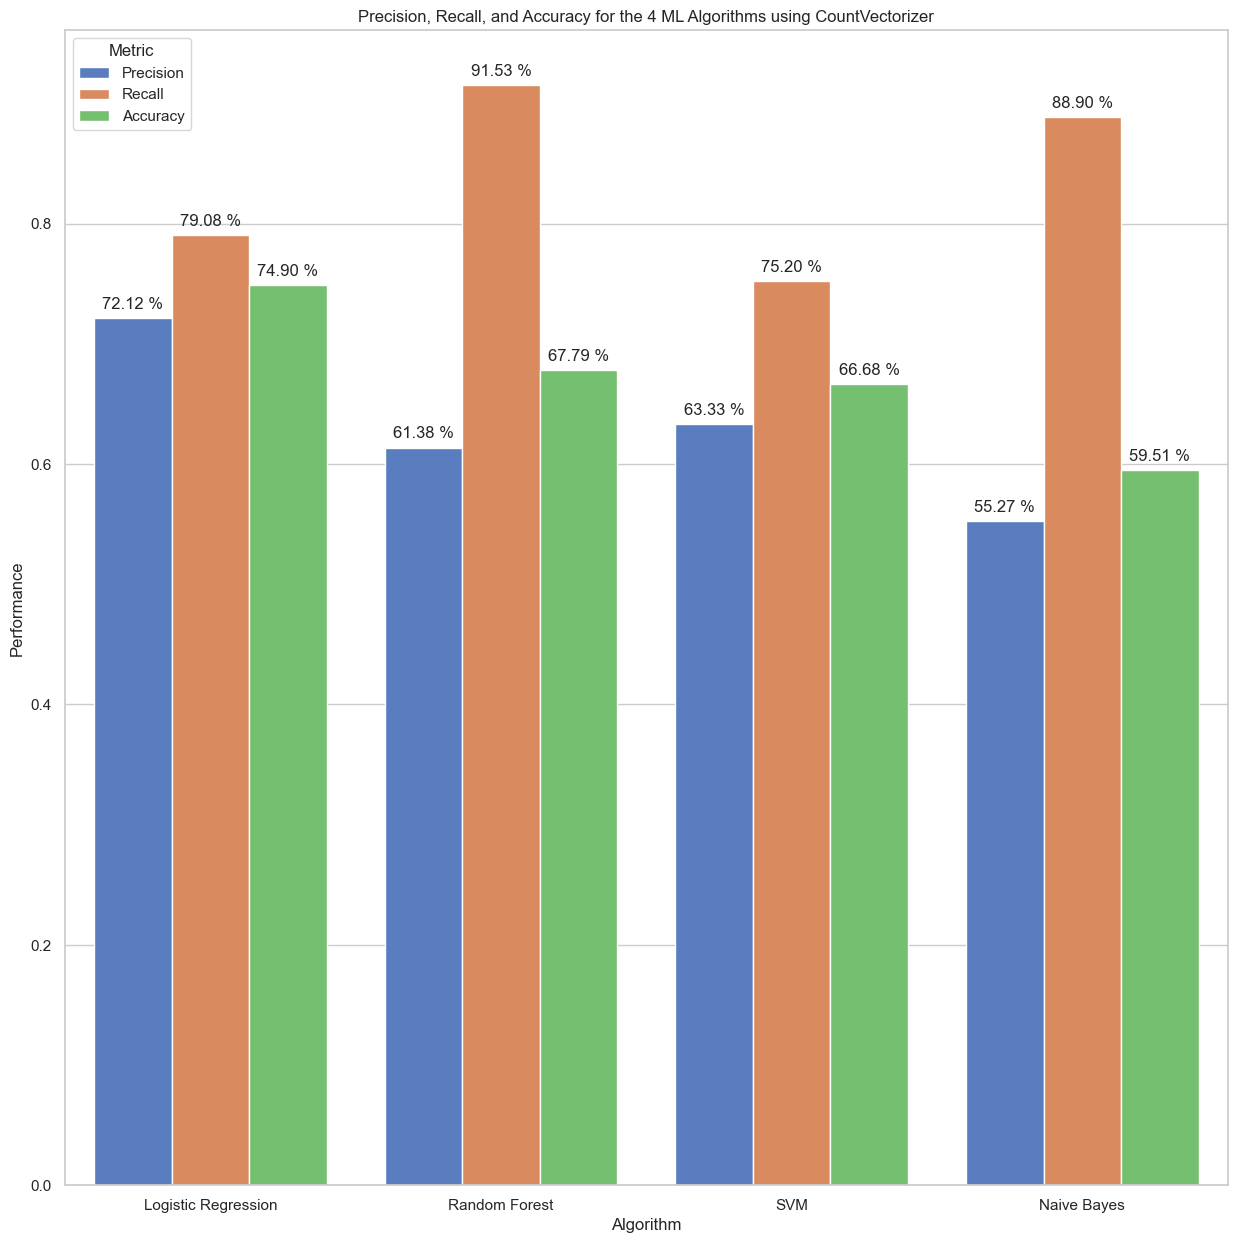

In [97]:
# Visualise the performance of the 4 algorithms for countvectorizer

# Define the names of the 3 algorithms used
algorithm_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']

# Define the precision, recall, and accuracy values obtained from the 3 algorithms.
precision_values = [p1, p2, p3, p4]
recall_values = [r1, r2, r3, r4]
accuracy_values = [a1, a2, a3, a4]

# Create a DataFrame for easy plotting
data = pd.DataFrame({
    'Algorithm': algorithm_names * 3,
    'Metric': ['Precision'] * 4 + ['Recall'] * 4 + ['Accuracy'] * 4,
    'Value': precision_values + recall_values + accuracy_values
})

# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))

# Use the 'hue' parameter to distinguish between precision, recall, and accuracy
ax = sns.barplot(x='Algorithm', y='Value', hue='Metric', data=data, palette='muted')

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Performance')
plt.title('Precision, Recall, and Accuracy for the 4 ML Algorithms using CountVectorizer')

# Show legend
plt.legend(title='Metric')

# Add values on top of each bar
for p in ax.patches:
    value = p.get_height()
    if value != 0.0:
        ax.annotate(f'{value * 100:.2f} %', (p.get_x() + p.get_width() / 2., value),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

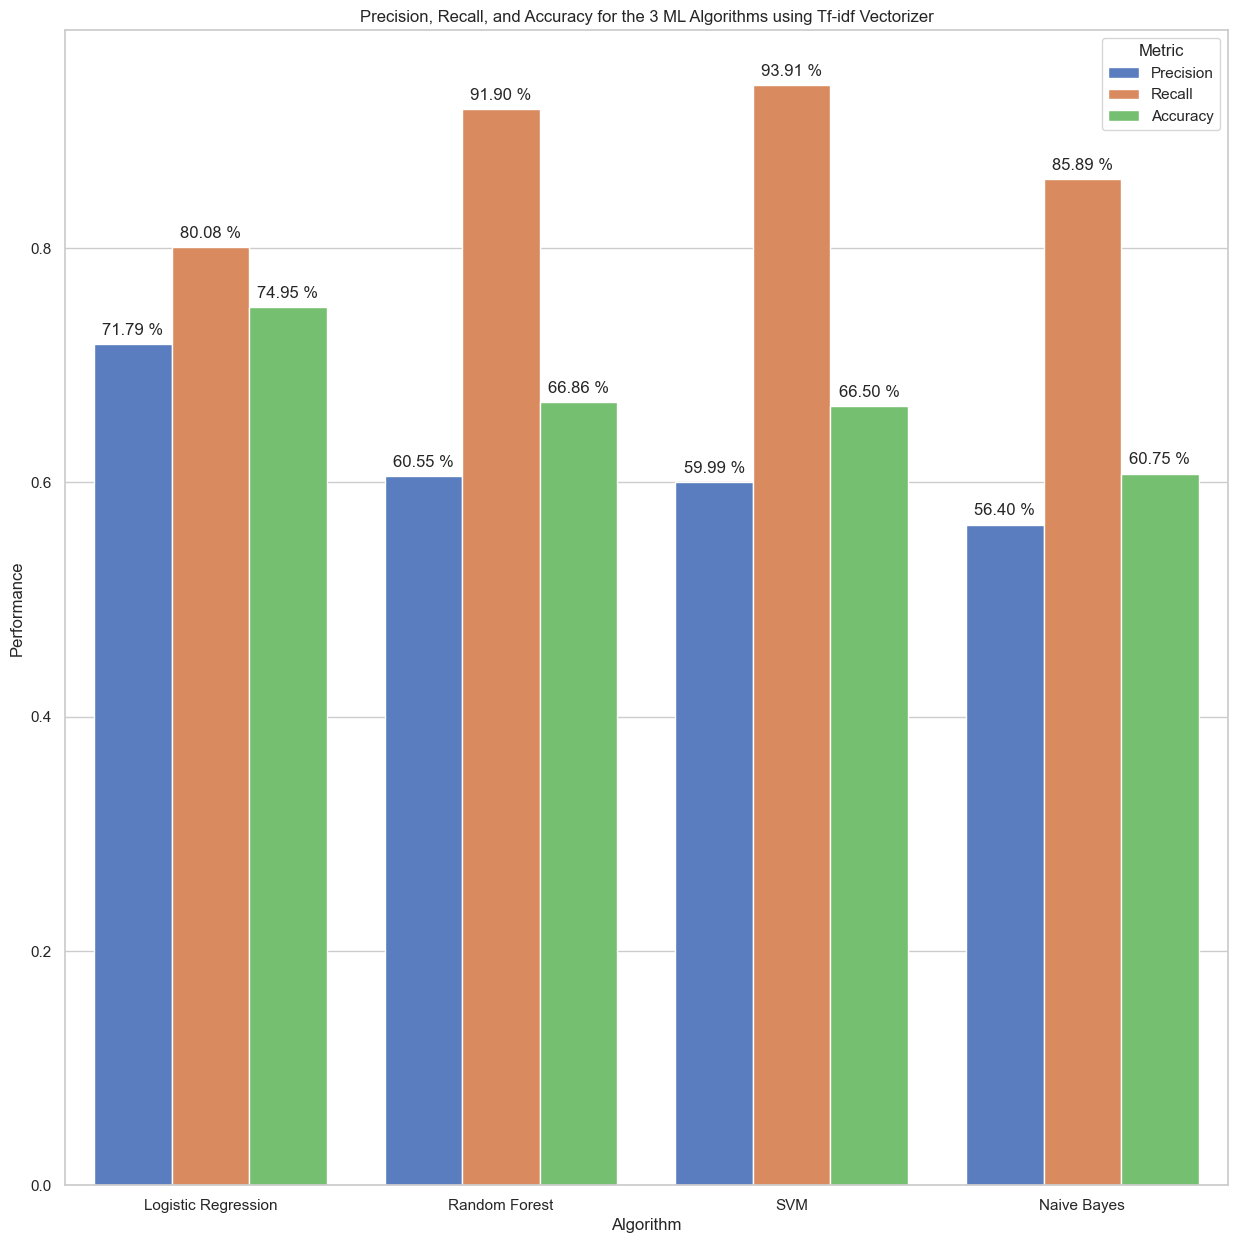

In [98]:
# Visualise the performance of the 3 algorithms for Tf-idf vectorizer

# Define the names of the 3 algorithms used
algorithm_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']

# Define the precision, recall, and accuracy values obtained from the 3 algorithms.
precision_values = [p1_vect, p2_vect, p3_vect, p4_vect]
recall_values = [r1_vect, r2_vect, r3_vect, r4_vect]
accuracy_values = [a1_vect, a2_vect, a3_vect, a4_vect]

# Create a DataFrame for easy plotting
data = pd.DataFrame({
    'Algorithm': algorithm_names * 3,
    'Metric': ['Precision'] * 4 + ['Recall'] * 4 + ['Accuracy'] * 4,
    'Value': precision_values + recall_values + accuracy_values
})

# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))

# Use the 'hue' parameter to distinguish between precision, recall, and accuracy
ax = sns.barplot(x='Algorithm', y='Value', hue='Metric', data=data, palette='muted')

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Performance')
plt.title('Precision, Recall, and Accuracy for the 3 ML Algorithms using Tf-idf Vectorizer')

# Show legend
plt.legend(title='Metric')

# Add values on top of each bar
for p in ax.patches:
    value = p.get_height()
    if value != 0.0:
        ax.annotate(f'{value * 100:.2f} %', (p.get_x() + p.get_width() / 2., value),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

## ....................................................Thank You .........................................................

In [99]:
###### Cross validation using K-Fold

In [100]:
from sklearn.model_selection import KFold, cross_val_score

In [101]:
k_folds = KFold(n_splits = 5)

scores1 = cross_val_score(clf1, X_train, y_train, cv = k_folds)

In [102]:
scores2 = cross_val_score(clf2, X_train, y_train, cv = k_folds)

In [103]:
scores3 = cross_val_score(clf3, X_train, y_train, cv = k_folds)

In [104]:
scores4 = cross_val_score(clf4, X_train, y_train, cv = k_folds)

In [105]:
print("::: Logistic Regression ::: ")
print("Cross Validation Scores: ", scores1)
print("Average CV Score: ", scores1.mean())
print("Number of CV Scores used in Average: ", len(scores1))
print("***************************************************")
print("::: Random Forest ::: ")
print("Cross Validation Scores: ", scores2)
print("Average CV Score: ", scores2.mean())
print("Number of CV Scores used in Average: ", len(scores2))
print("***************************************************")
print("::: SVM ::: ")
print("Cross Validation Scores: ", scores3)
print("Average CV Score: ", scores3.mean())
print("Number of CV Scores used in Average: ", len(scores3))
print("***************************************************")
print("::: Naive Bayes ::: ")
print("Cross Validation Scores: ", scores4)
print("Average CV Score: ", scores4.mean())
print("Number of CV Scores used in Average: ", len(scores4))

::: Logistic Regression ::: 
Cross Validation Scores:  [0.769  0.742  0.76   0.745  0.7415]
Average CV Score:  0.7515000000000001
Number of CV Scores used in Average:  5
***************************************************
::: Random Forest ::: 
Cross Validation Scores:  [0.6975 0.739  0.7035 0.547  0.667 ]
Average CV Score:  0.6708000000000001
Number of CV Scores used in Average:  5
***************************************************
::: SVM ::: 
Cross Validation Scores:  [0.6895 0.678  0.66   0.631  0.6685]
Average CV Score:  0.6654
Number of CV Scores used in Average:  5
***************************************************
::: Naive Bayes ::: 
Cross Validation Scores:  [0.638  0.604  0.619  0.6055 0.62  ]
Average CV Score:  0.6173
Number of CV Scores used in Average:  5


In [106]:
###### gridsearchcv

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
# Define the parameter grid for each algorithm
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} # parameters for Logistic Regression
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]} # parameters for Random Forest
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']} # parameters for SVM
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}  # Adjust as needed


In [109]:
# Create instances of the classifiers
logistic_reg = LogisticRegression()
random_forest = RandomForestClassifier()
svm_classifier = svm.SVC()
nb_classifier = GaussianNB()

In [110]:
# Create a dictionary mapping each algorithm to its parameter grid
param_grids = {'Logistic Regression': (logistic_reg, param_grid_lr),
               'Random Forest': (random_forest, param_grid_rf),
               'SVM': (svm_classifier, param_grid_svm),
               'Naive Bayes':(nb_classifier, param_grid_nb)
              }

In [111]:
# Perform grid search for each algorithm

best_params_dict = {}  # Dictionary to store the best parameters
best_train_accuracy_dict = {}  # Dictionary to store the corresponding accuracy

for algo_name, (classifier, param_grid) in param_grids.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Store the best parameters and the corresponding accuracy
    best_params_dict[algo_name] = grid_search.best_params_
    key = algo_name + " Training Accuracy"
    best_train_accuracy_dict[key] = grid_search.best_score_
#   best_accuracy_dict[algo_name] = grid_search.best_score_

    # Print the best parameters and the corresponding accuracy
    print(f"Best parameters for {algo_name}: {grid_search.best_params_}")
    print(f"Training Accuracy for {algo_name}: {grid_search.best_score_:.4f}")



C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Best parameters for Logistic Regression: {'C': 1}
Training Accuracy for Logistic Regression: 0.7460
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Training Accuracy for Random Forest: 0.7311
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Training Accuracy for SVM: 0.7447
Best parameters for Naive Bayes: {'var_smoothing': 1e-05}
Training Accuracy for Naive Bayes: 0.6392


In [112]:
print(best_params_dict,"\n","****************","\n",best_train_accuracy_dict)

{'Logistic Regression': {'C': 1}, 'Random Forest': {'max_depth': None, 'n_estimators': 50}, 'SVM': {'C': 1, 'kernel': 'linear'}, 'Naive Bayes': {'var_smoothing': 1e-05}} 
 **************** 
 {'Logistic Regression Training Accuracy': 0.7459997049494992, 'Random Forest Training Accuracy': 0.7310993846835193, 'SVM Training Accuracy': 0.7446996649275005, 'Naive Bayes Training Accuracy': 0.6391992828557}


In [113]:
from sklearn.metrics import accuracy_score

In [114]:
best_test_accuracy_dict = {}

for algo_name, (classifier, param_grid) in param_grids.items():    
    
    grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    best_test_accuracy_dict[algo_name] = test_accuracy
    
    print(f"Test Accuracy for {algo_name}: {test_accuracy:.4f}\n")

C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Test Accuracy for Logistic Regression: 0.7490

Test Accuracy for Random Forest: 0.7329

Test Accuracy for SVM: 0.7422

Test Accuracy for Naive Bayes: 0.6322



In [115]:
best_test_accuracy_dict


{'Logistic Regression': 0.749,
 'Random Forest': 0.7329,
 'SVM': 0.7422,
 'Naive Bayes': 0.6322}

In [116]:
best_params_dict


{'Logistic Regression': {'C': 1},
 'Random Forest': {'max_depth': None, 'n_estimators': 50},
 'SVM': {'C': 1, 'kernel': 'linear'},
 'Naive Bayes': {'var_smoothing': 1e-05}}

In [117]:
best_train_accuracy_dict 

{'Logistic Regression Training Accuracy': 0.7459997049494992,
 'Random Forest Training Accuracy': 0.7310993846835193,
 'SVM Training Accuracy': 0.7446996649275005,
 'Naive Bayes Training Accuracy': 0.6391992828557}

In [118]:
# cross validation for tfidf vectorizer

In [119]:
k_folds = KFold(n_splits = 5)

scores1_vect = cross_val_score(clf1_vect, X_train_vect, y_train_vect, cv = k_folds)


In [120]:
scores2_vect = cross_val_score(clf2_vect, X_train_vect, y_train_vect, cv = k_folds)


In [122]:
scores3_vect = cross_val_score(clf3_vect, X_train_vect, y_train_vect, cv = k_folds)



In [123]:
scores4_vect = cross_val_score(clf4_vect, X_train_vect, y_train_vect, cv = k_folds)

In [124]:
print("::: Logistic Regression ::: ")
print("Cross Validation Scores: ", scores1_vect)
print("Average CV Score: ", scores1_vect.mean())
print("Number of CV Scores used in Average: ", len(scores1_vect))
print("***************************************************")
print("::: Random Forest ::: ")
print("Cross Validation Scores: ", scores2_vect)
print("Average CV Score: ", scores2_vect.mean())
print("Number of CV Scores used in Average: ", len(scores2_vect))
print("***************************************************")
print("::: SVM ::: ")
print("Cross Validation Scores: ", scores3_vect)
print("Average CV Score: ", scores3_vect.mean())
print("Number of CV Scores used in Average: ", len(scores3_vect))
print("::: Naive Bayes ::: ")
print("Cross Validation Scores: ", scores4_vect)
print("Average CV Score: ", scores4_vect.mean())
print("Number of CV Scores used in Average: ", len(scores4_vect))

::: Logistic Regression ::: 
Cross Validation Scores:  [0.761  0.752  0.7595 0.736  0.741 ]
Average CV Score:  0.7499
Number of CV Scores used in Average:  5
***************************************************
::: Random Forest ::: 
Cross Validation Scores:  [0.68   0.7275 0.7095 0.56   0.6615]
Average CV Score:  0.6677
Number of CV Scores used in Average:  5
***************************************************
::: SVM ::: 
Cross Validation Scores:  [0.671  0.725  0.6915 0.5885 0.643 ]
Average CV Score:  0.6638
Number of CV Scores used in Average:  5
::: Naive Bayes ::: 
Cross Validation Scores:  [0.6485 0.6175 0.635  0.627  0.635 ]
Average CV Score:  0.6326
Number of CV Scores used in Average:  5


In [125]:
# gridsearchcv

In [126]:
# Perform grid search for each algorithm

best_params_dict_vect = {}  # Dictionary to store the best parameters
best_train_accuracy_dict_vect = {}  # Dictionary to store the corresponding accuracy

for algo_name, (classifier, param_grid) in param_grids.items():
    grid_search_vect = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy')
    grid_search_vect.fit(X_train_vect, y_train_vect)

    # Store the best parameters and the corresponding accuracy
    best_params_dict_vect[algo_name] = grid_search_vect.best_params_
    key = algo_name + " Training Accuracy"
    best_train_accuracy_dict_vect[key] = grid_search_vect.best_score_
#   best_accuracy_dict[algo_name] = grid_search.best_score_

    
    # Print the best parameters and the corresponding accuracy
    print(f"Best parameters for {algo_name}: {grid_search_vect.best_params_}")
    print(f"Training Accuracy for {algo_name}: {grid_search_vect.best_score_:.4f}")


C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Best parameters for Logistic Regression: {'C': 1}
Training Accuracy for Logistic Regression: 0.7468
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Training Accuracy for Random Forest: 0.7324
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Training Accuracy for SVM: 0.7540
Best parameters for Naive Bayes: {'var_smoothing': 1e-05}
Training Accuracy for Naive Bayes: 0.6479


In [127]:
best_test_accuracy_dict_vect = {}

for algo_name, (classifier, param_grid) in param_grids.items():    
    
    grid_search_vect = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy')
    grid_search_vect.fit(X_train_vect, y_train_vect)
    
    # Make predictions on the test set
    y_pred_vect = grid_search_vect.predict(X_test_vect)
    test_accuracy_vect = accuracy_score(y_test_vect, y_pred_vect)
    
    best_test_accuracy_dict_vect[algo_name] = test_accuracy_vect
    
    print(f"Test Accuracy for {algo_name}: {test_accuracy_vect:.4f}\n")

C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Test Accuracy for Logistic Regression: 0.7495

Test Accuracy for Random Forest: 0.7273

Test Accuracy for SVM: 0.7523

Test Accuracy for Naive Bayes: 0.6405



In [128]:
best_test_accuracy_dict_vect

{'Logistic Regression': 0.7495,
 'Random Forest': 0.7273,
 'SVM': 0.7523,
 'Naive Bayes': 0.6405}

In [129]:
best_params_dict_vect

{'Logistic Regression': {'C': 1},
 'Random Forest': {'max_depth': None, 'n_estimators': 50},
 'SVM': {'C': 1, 'kernel': 'rbf'},
 'Naive Bayes': {'var_smoothing': 1e-05}}

In [130]:
best_train_accuracy_dict_vect

{'Logistic Regression Training Accuracy': 0.7467994849874909,
 'Random Forest Training Accuracy': 0.7323990347445063,
 'SVM Training Accuracy': 0.7540000850714946,
 'Naive Bayes Training Accuracy': 0.6478994930086891}

In [131]:
# from tabulate import tabulate

alg = list(best_test_accuracy_dict.keys())

mat = ["Best Paramters", "Train Accuracy", "Test Accuracy"]

s=[]
for values in best_params_dict.values():
    s.append(values)

k=[]
for values in best_train_accuracy_dict.values():
    values = "{:.2f} %".format(round(values*100, 2))
    k.append(values)

j=[]
for values in best_test_accuracy_dict.values():
    values = "{:.2f} %".format(round(values*100, 2))
    j.append(values)

val = [list(t) for t in zip(s,k,j)]
 
table = [
    [mat[0], val[0][0], val[1][0], val[2][0], val[3][0]],
    [mat[1], val[0][1], val[1][1], val[2][1], val[3][1]],
    [mat[2], val[0][2], val[1][2], val[2][2], val[3][2]]
]

# Adding a title for the table
title = "Algorithm Performance Metrics for count vectorizer after GridSearchCV"

t = tabulate(table, tablefmt="fancy_grid", headers=algorithms)

print("\t",title)
print(t,"\n","*************************************************************"*2)


alg_vect =  list(best_test_accuracy_dict_vect.keys())

mat_vect = ["Best Paramters", "Train Accuracy", "Test Accuracy"]

s_vect=[]
for values in best_params_dict_vect.values():
    s_vect.append(values)

k_vect=[]
for values in best_train_accuracy_dict_vect.values():
    values = "{:.2f} %".format(round(values*100, 2))
    k_vect.append(values)

j_vect=[]
for values in best_test_accuracy_dict_vect.values():
    values = "{:.2f} %".format(round(values*100, 2))
    j_vect.append(values)

val_vect = [list(t) for t in zip(s_vect,k_vect,j_vect)]
 
# print(val_vect)

table_vect = [
    [mat_vect[0], val_vect[0][0], val_vect[1][0], val_vect[2][0], val_vect[3][0]],
    [mat_vect[1], val_vect[0][1], val_vect[1][1], val_vect[2][1], val_vect[3][1]],
    [mat_vect[2], val_vect[0][2], val_vect[1][2], val_vect[2][2], val_vect[3][2]]
]


# Adding a title for the table
title_vect = "Algorithm Performance Metrics for Tf-idf vectorizer after GridSearchCV"

t_vect = tabulate(table_vect, tablefmt="fancy_grid", headers=algorithms)

print("\t",title_vect)
print(t_vect,"\n","*************************************************************"*2)


	 Algorithm Performance Metrics for count vectorizer after GridSearchCV
╒════════════════╤═════════════════════╤═════════════════════════════════════════╤══════════════════════════════╤══════════════════════════╕
│                │ Linear Regression   │ Random Forest                           │ SVM                          │ Naive Bayes              │
╞════════════════╪═════════════════════╪═════════════════════════════════════════╪══════════════════════════════╪══════════════════════════╡
│ Best Paramters │ {'C': 1}            │ {'max_depth': None, 'n_estimators': 50} │ {'C': 1, 'kernel': 'linear'} │ {'var_smoothing': 1e-05} │
├────────────────┼─────────────────────┼─────────────────────────────────────────┼──────────────────────────────┼──────────────────────────┤
│ Train Accuracy │ 74.60 %             │ 73.11 %                                 │ 74.47 %                      │ 63.92 %                  │
├────────────────┼─────────────────────┼─────────────────────────────────────────┼

4 * 4 * 4 *


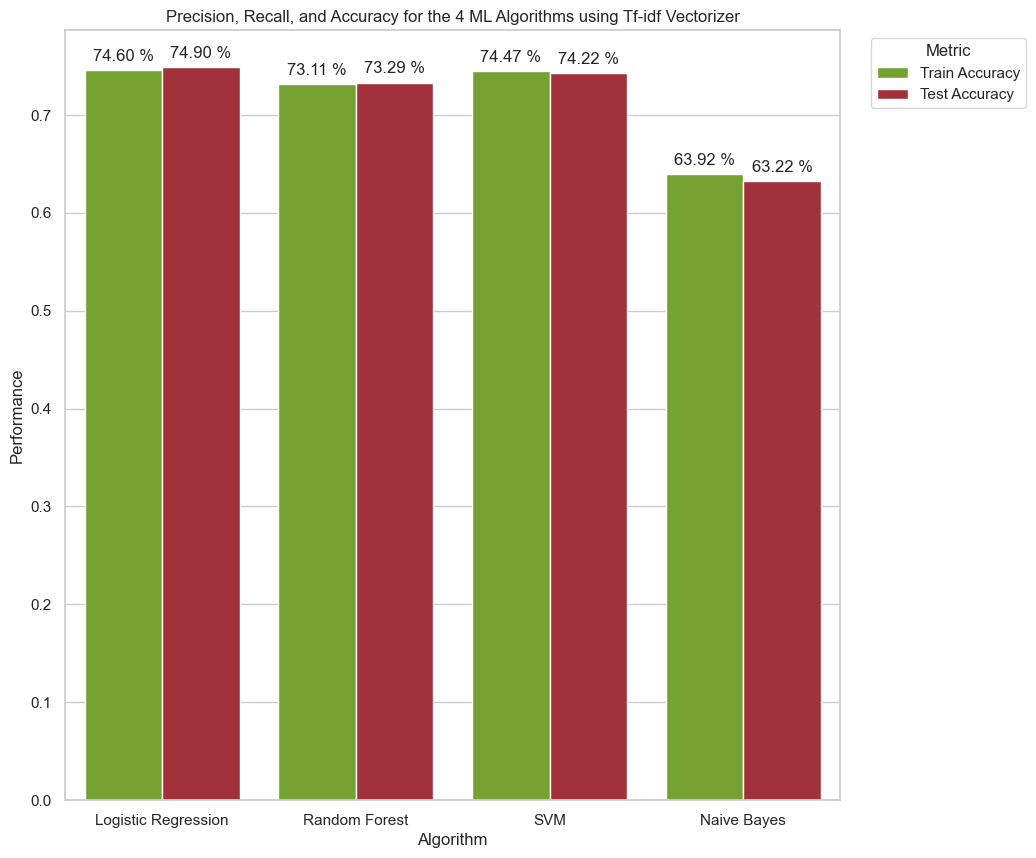

In [133]:
# Visualise the performance of the 4 algorithms for Tf-idf vectorizer

# Define the names of the 4 algorithms used
algorithm_names = ['Logistic Regression', 'Random Forest', 'SVM','Naive Bayes']

#best_train_accuracy_dict_vect

trainvalues = list(best_train_accuracy_dict.values())
testvalues = list(best_test_accuracy_dict.values())

print(len(algorithm_names),"*",len(trainvalues),"*",len(testvalues),"*")

# Create a DataFrame for easy plotting
data = pd.DataFrame({
    'Algorithm': algorithm_names * 2,
    'Metric': ['Train Accuracy'] * 4 + ['Test Accuracy'] * 4,
    'Value': trainvalues + testvalues
})

# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))

c = ['#77b41f',"#b41f2d"] # for color:#77b41f for green, #b41f2d for red

# Use the 'hue' parameter to distinguish between precision, recall, and accuracy
ax = sns.barplot(x='Algorithm', y='Value', hue='Metric', data=data, palette=c)

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Performance')
plt.title('Precision, Recall, and Accuracy for the 4 ML Algorithms using Tf-idf Vectorizer')

# Show legend
plt.legend(title='Metric',bbox_to_anchor=(.75, .5, 0.5, 0.5)) 

# Add values on top of each bar
for p in ax.patches:
    value = p.get_height()
    if value != 0.0:
        ax.annotate(f'{value * 100:.2f} %', (p.get_x() + p.get_width() / 2., value),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Show the plot
plt.show()

4 * 4 * 4 *


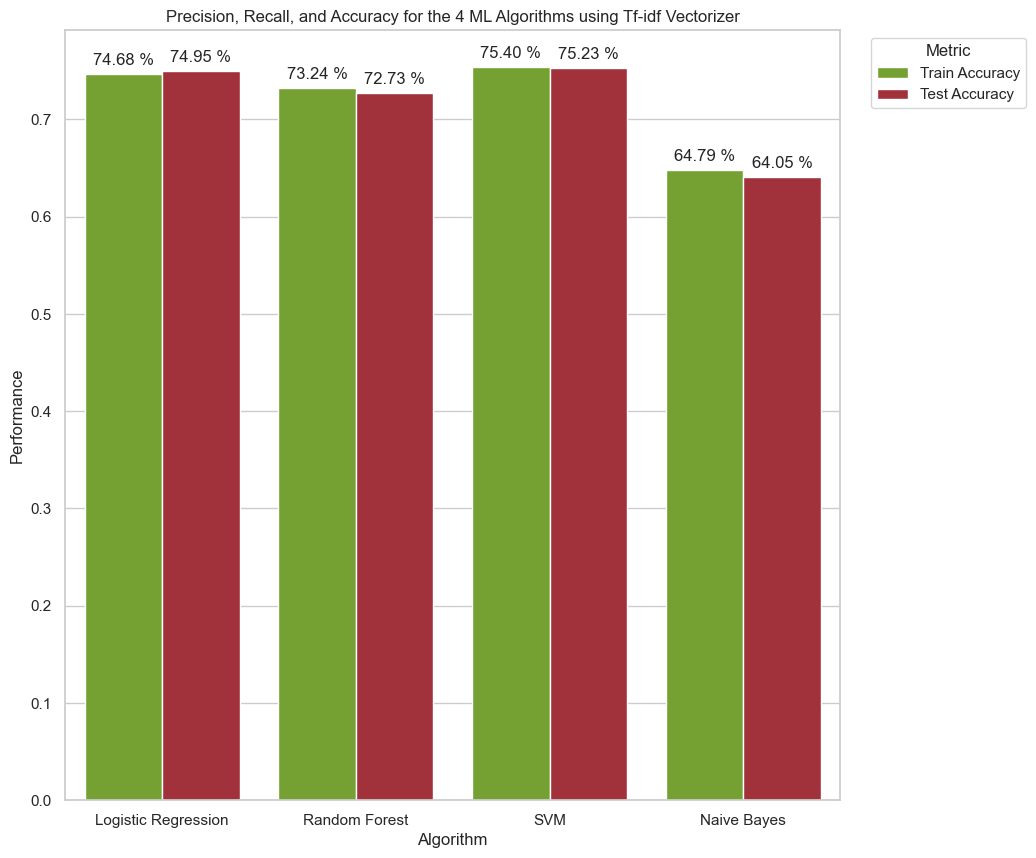

In [132]:
# Visualise the performance of the 4 algorithms for Tf-idf vectorizer

# Define the names of the 4 algorithms used
algorithm_names = ['Logistic Regression', 'Random Forest', 'SVM','Naive Bayes']

#best_train_accuracy_dict_vect

trainvalues = list(best_train_accuracy_dict_vect.values())
testvalues = list(best_test_accuracy_dict_vect.values())

print(len(algorithm_names),"*",len(trainvalues),"*",len(testvalues),"*")

# Create a DataFrame for easy plotting
data = pd.DataFrame({
    'Algorithm': algorithm_names * 2,
    'Metric': ['Train Accuracy'] * 4 + ['Test Accuracy'] * 4,
    'Value': trainvalues + testvalues
})

# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))

c = ['#77b41f',"#b41f2d"] # for color:#77b41f for green, #b41f2d for red

# Use the 'hue' parameter to distinguish between precision, recall, and accuracy
ax = sns.barplot(x='Algorithm', y='Value', hue='Metric', data=data, palette=c)

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Performance')
plt.title('Precision, Recall, and Accuracy for the 4 ML Algorithms using Tf-idf Vectorizer')

# Show legend
plt.legend(title='Metric',bbox_to_anchor=(.75, .5, 0.5, 0.5)) 

# Add values on top of each bar
for p in ax.patches:
    value = p.get_height()
    if value != 0.0:
        ax.annotate(f'{value * 100:.2f} %', (p.get_x() + p.get_width() / 2., value),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Show the plot
plt.show()

# ................................................... Thank You ...................................................

In [139]:
# Saving the model locally (optinal)

In [140]:
# 1. Using joblib
# !pip install joblib

In [141]:
# import joblib

# # Save the models
# joblib.dump(clf1, 'logistic_regression_model.pkl')
# joblib.dump(clf1_vect, 'logistic_regression_model_vect.pkl')

# joblib.dump(clf2, 'random_forest_model.pkl')
# joblib.dump(clf2_vect, 'random_forest_model_vect.pkl')

# joblib.dump(clf3, 'svm_model.pkl')
# joblib.dump(clf3_vect, 'svm_model_vect.pkl')

# joblib.dump(clf4, 'naive_bayes_model.pkl')
# joblib.dump(clf4_vect, 'naive_bayes_model_vect.pkl')



In [142]:
# # Load the models
# loaded_clf1 = joblib.load('logistic_regression_model.pkl')
# loaded_clf1_vect = joblib.load('logistic_regression_model_vect.pkl')

# loaded_clf2 = joblib.load('random_forest_model.pkl')
# loaded_clf2_vect = joblib.load('random_forest_model_vect.pkl')

# loaded_clf3 = joblib.load('svm_model.pkl')
# loaded_clf3_vect = joblib.load('svm_model_vect.pkl')

# loaded_clf4 = joblib.load('naive_bayes_model.pkl')
# loaded_clf4_vect = joblib.load('naive_bayes_model_vect.pkl')


In [143]:
# 2. pickle
# import pickle 

# # Save the models
# pickle.dump(clf1, 'logistic_regression_model.pkl')
# pickle.dump(clf1_vect, 'logistic_regression_model_vect.pkl')

# pickle.dump(clf2, 'random_forest_model.pkl')
# pickle.dump(clf2_vect, 'random_forest_model_vect.pkl')

# pickle.dump(clf3, 'svm_model.pkl')
# pickle.dump(clf3_vect, 'svm_model_vect.pkl')

# pickle.dump(clf4, 'naive_bayes_model.pkl')
# pickle.dump(clf4_vect, 'naive_bayes_model_vect.pkl')



In [144]:
# # Load the models
# Load the models
# with open('logistic_regression_model.pkl', 'rb') as file:
#     loaded_clf1 = pickle.load(file)

# with open('logistic_regression_model_vect.pkl', 'rb') as file:
#     loaded_clf1_vect = pickle.load(file)

# with open('random_forest_model.pkl', 'rb') as file:
#     loaded_clf2 = pickle.load(file)

# with open('random_forest_model_vect.pkl', 'rb') as file:
#     loaded_clf2_vect = pickle.load(file)

# with open('svm_model.pkl', 'rb') as file:
#     loaded_clf3 = pickle.load(file)

# with open('svm_model_vect.pkl', 'rb') as file:
#     loaded_clf3_vect = pickle.load(file)

# with open('naive_bayes_model.pkl', 'rb') as file:
#     loaded_clf4 = pickle.load(file)

# with open('naive_bayes_model_vect.pkl', 'rb') as file:
#     loaded_clf4_vect = pickle.load(file)

# # Use the loaded pickled model to make predictions 
# loaded_clf1.predict(X_test) 
# loaded_clf1_vect.predict(X_test)
# loaded_clf2.predict(X_test) 
# loaded_clf2_vect.predict(X_test)
# loaded_clf3.predict(X_test) 
# loaded_clf3_vect.predict(X_test)
# loaded_clf4.predict(X_test) 
# loaded_clf4_vect.predict(X_test)